<a href="https://colab.research.google.com/github/XueYang0130/1CSD1_Thesis/blob/main/1_Q_Learning_in_Gridworld_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Part 1 Model Construction and Training Process** 

This is a 5X5 GridWorld. Thus, there are 25 states shown as below:

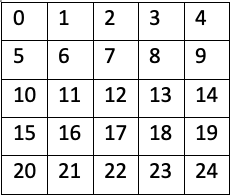


The agent has a set of actions: up, down, left, right, which is represented as [0,1,2,3]. Assume that state 12 has an obstacle, the agent cannot go over it and will get a penalty -5 if hitting it.

In each episode:
The start state is 0, the target state is 24.
The penalty of hitting the wall is -1; the penalty of taking one step is -1.
The reward of arriving the target state is 10.

In [1]:
#import libraries
import numpy as np
import random 
import matplotlib.pyplot as plt

In [11]:
#define an environment class
class Env(object):
    def __init__(self):
      self.states=list(range(25)) #a set of sets
      self.actions=[0,1,2,3] #a set of actions: up, down, left, right
      self.start_state=0 #define start state and target state
      self.target_state=24 
      self.step_penalty=-1 #define penalty for each step
      self.wall_penalty=-1 #define penalty for hitting the wall
      self.obstacle_penalty=-5 #define penalty for hitting the obstacle
      self.target_reward=10 #define the reward for arriving the target state
      self.current_state=0 #initialize current state and next state to zeros
      self.next_state=0 #initialize the next state to 0
      self.done=False #False: game over; True: game not over
      self.total_reward=0 #total reward in each episode
      self.total_reward_list=[] #total rewards in all episodes
      self.step_num=0 

    def reset(self):
      self.start_state=0
      self.current_state=0
      self.next_state=0
      self.done=False
      self.total_reward=0

    #action: go up
    def do_step(self,action):
      reward=0
      if action ==0:
        if self.current_state in [0,1,2,3,4]:
          reward+=self.wall_penalty+self.step_penalty
          self.next_state=self.current_state
        elif self.current_state==17:
          reward+=self.step_penalty+self.obstacle_penalty
          self.next_state=self.current_state
        else:
          self.next_state=self.current_state-5
          reward+=self.step_penalty
      
      #action: go down
      if action==1: 
        if self.current_state in [20,21,22,23,24]:
          self.next_state=self.current_state
          reward+=self.wall_penalty+self.step_penalty
        elif self.current_state==7:
          reward+=self.step_penalty+self.obstacle_penalty
          self.next_state=self.current_state
        else:
          self.next_state=self.current_state+5
          reward+=self.step_penalty
          if self.next_state==self.target_state:
            self.done=True
            reward+=self.target_reward

      #action: go left
      if action==2: 
        if self.current_state in [0,5,10,15,20]:
          reward+=self.wall_penalty+self.step_penalty
          self.next_state=self.current_state
        elif self.current_state==13:
          reward+=self.step_penalty+self.obstacle_penalty
          self.next_state=self.current_state
        else:
          self.next_state=self.current_state-1
          reward+=self.step_penalty

      #action: go right
      if action==3: 
        if self.current_state in [4,9,14,19,24]:
          self.next_state=self.current_state
          reward+=self.wall_penalty+self.step_penalty
        elif self.current_state==11:
          reward+=self.step_penalty+self.obstacle_penalty
          self.next_state=self.current_state
        else:
          self.next_state=self.current_state+1
          reward+=self.step_penalty
          if self.next_state==self.target_state:
            self.done=True
            reward+=self.target_reward

      self.total_reward+=reward #update total reward
      self.current_state=self.next_state #update current state
      if self.done==True: #if the game is over
        self.total_reward_list.append(self.total_reward)
      self.step_num+=1 #update number of steps the agent has taken
      return reward, self.next_state, self.done #return reward, next step, and the state of "done"


In [22]:
#define an agent class
class Agent(object):
  def __init__(self, env):
    self.env=env
    self.actions=[0,1,2,3] #actions that can be chosen
    self.gamma=0.7 #discount variable
    self.alpha=0.3 #learning rate
    self.Q_table=np.zeros((25,4)) #initialize Q table with all zeros
    self.reward_list=[]
  #reset before each episode
  def reset(self): 
    self.env.reset()
    self.Q_table=np.zeros((25,4))

  def do_step(self,epsilon,test=False): 
    #get current state
    current_state=self.env.current_state
    #select an action
    action=self.epsilon_greedy(current_state, epsilon)
    #get reward, next state and state of done of this step
    reward, next_state,done=self.env.do_step(action)
    #if test=true, go for evaluation process
    if test: 
      print("Position:",next_state)
    #if test=false, update Q table
    else:
      self.update_Q(reward, current_state,next_state,action)
    return done #return state of "done"

  #define epsilon greedy exploration method (epsilon decays in each episode)
  def epsilon_greedy(self, state, epsilon):
    if np.random.rand()<epsilon:
      return random.choice(self.actions) #select an action at random 
    else:
      return np.argmax(self.Q_table[state]) #otherwise choose the action with maximum Q value

  #Q value update rule
  def update_Q(self, reward, current_state, next_state, action):
    self.Q_table[current_state, action]=self.Q_table[current_state, action]+self.alpha*(reward+self.gamma*np.max(self.Q_table[next_state])-self.Q_table[current_state,action])



In [23]:
#Training

env=Env() #create an environment class
agent=Agent(env) #create an agent class
agent.reset() #reset the agent
epsilon=0.7 #initial value of epsilon
n=100 #episode

for i in range(n): 
  env.reset() #reset environment
  epsilon=max(epsilon-1/n,0) #epsilon decays
  while True: 
    done=agent.do_step(epsilon) #get state of "done"
    if done==True: #game is over
      break

In [20]:
#Store the learned Q table for evaluation later.
Q_table=agent.Q_table

**Visualize the total reward curve for the agent in each episode, showing that the curve converges.**

Text(0, 0.5, 'Accumulated Reward')

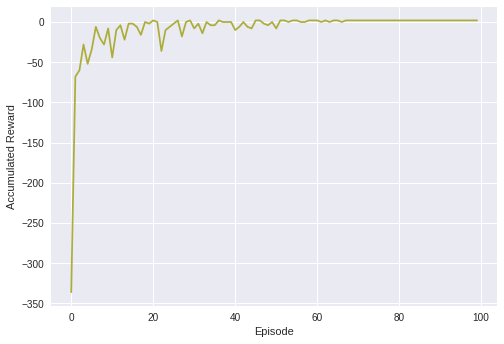

In [24]:
#visualizzation
plt.style.use('seaborn')
plt.figure()
#plt.title( "total reward curve")
plt.plot(np.array(range(n)), env.total_reward_list, color="#adad3b", label="sum reward")
plt.xlabel("Episode")
plt.ylabel("Accumulated Reward")

#after over 30 episodes, the total reward of each episode converges to a constant.

###**Part 2 Evaluation**

In [26]:
agent2=Agent(env) #create an agent class
epsilon=0 #only focus on greedy exploitation
agent2.Q_table=Q_table
 
env.reset() #reset environment
while True: 
  done=agent2.do_step(epsilon,test=True) #get state of "done"
  if done==True: #game is over
    break


position: 5
position: 10
position: 15
position: 16
position: 17
position: 18
position: 19
position: 24


In [28]:
#total reward 
env.total_reward_list[-1]

2